In [53]:
#!pip install dtreeviz

In [54]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import dtreeviz
import graphviz
import graphviz.backend as be
from IPython.display import Image, display_svg, SVG
import warnings
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )

In [55]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import matplotlib.font_manager
fm = matplotlib.font_manager
fm._get_fontconfig_fonts.cache_clear()
plt.rcParams['font.family'] = 'Times New Roman'

## Loading data

In [56]:
df= pd.read_csv('../data/cleaned/data_with_outlier2.csv')
df

,sqft_above,sqft_lot15,sqft_living15,id,waterfront,view,condition,grade,bedrooms,sqft_basement_cat,floors,yr_built_cat,zip,id.1,price
0,1180,5650,1340,7129300520,0,0,3,7,3,1,1.00,1,1,7129300520,221900
1,2170,7639,1690,6414100192,0,0,3,7,3,2,2.00,1,1,6414100192,538000
2,770,8062,2720,5631500400,0,0,3,6,2,1,1.00,1,0,5631500400,180000
3,1050,5000,1360,2487200875,0,0,5,7,4,3,1.00,1,1,2487200875,604000
4,1680,7503,1800,1954400510,0,0,3,8,3,1,1.00,1,0,1954400510,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1530,1509,1530,263000018,0,0,3,8,3,1,3.00,2,1,263000018,360000
21593,2310,7200,1830,6600060120,0,0,3,8,4,1,2.00,3,1,6600060120,400000
21594,1020,2007,1020,1523300141,0,0,3,7,2,1,2.00,2,1,1523300141,402101
21595,1600,1287,1410,291310100,0,0,3,8,3,1,2.00,2,0,291310100,400000


In [57]:
#divide x and y
X = df.drop(columns=["price","id","id.1"])
y = df["price"]


In [58]:
X.columns

Index(['sqft_above', 'sqft_lot15', 'sqft_living15', 'waterfront', 'view',
       'condition', 'grade', 'bedrooms', 'sqft_basement_cat', 'floors',
       'yr_built_cat', 'zip'],
      dtype='object')

we will power transform our X dataset

In [59]:

from sklearn.preprocessing import PowerTransformer
pt= PowerTransformer()
pt.fit(X)

PowerTransformer()

In [60]:
X_transformed= pt.transform(X)
X= pd.DataFrame(X_transformed, columns=X.columns)

In [61]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
sqft_above,21597.00,0.00,1.00,-4.14,-0.72,-0.05,0.75,3.42
sqft_lot15,21597.00,-0.00,1.00,-4.06,-0.48,0.05,0.40,3.95
sqft_living15,21597.00,0.00,1.00,-5.68,-0.70,-0.03,0.72,3.24
waterfront,21597.00,-0.00,1.00,-0.09,-0.09,-0.09,-0.09,11.47
view,21597.00,-0.00,1.00,-0.33,-0.33,-0.33,-0.33,3.03
condition,21597.00,-0.00,1.00,-8.12,-0.60,-0.60,0.99,2.08
grade,21597.00,-0.00,1.00,-7.21,-0.51,-0.51,0.39,3.30
bedrooms,21597.00,-0.00,1.00,-3.27,-0.35,-0.35,0.73,13.81
sqft_basement_cat,21597.00,0.00,1.00,-0.79,-0.79,-0.79,1.32,1.53
floors,21597.00,-0.00,1.00,-0.98,-0.98,0.27,1.03,2.13


standard normalization to my dataset  to bound them between [0,1] or [1,-1]

In [62]:
from sklearn.preprocessing import minmax_scale
X_scaled= minmax_scale(X)
X= pd.DataFrame(X_scaled, columns=X.columns)
X.describe().T

,count,mean,std,min,25%,50%,75%,max
sqft_above,21597.00,0.55,0.13,0.00,0.45,0.54,0.65,1.00
sqft_lot15,21597.00,0.51,0.12,0.00,0.45,0.51,0.56,1.00
sqft_living15,21597.00,0.64,0.11,0.00,0.56,0.63,0.72,1.00
waterfront,21597.00,0.01,0.09,0.00,0.00,0.00,0.00,1.00
view,21597.00,0.10,0.30,0.00,0.00,0.00,0.00,1.00
condition,21597.00,0.80,0.10,0.00,0.74,0.74,0.89,1.00
grade,21597.00,0.69,0.10,0.00,0.64,0.64,0.72,1.00
bedrooms,21597.00,0.19,0.06,0.00,0.17,0.17,0.23,1.00
sqft_basement_cat,21597.00,0.34,0.43,0.00,0.00,0.00,0.91,1.00
floors,21597.00,0.31,0.32,0.00,0.00,0.40,0.65,1.00


In [63]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
sqft_above,21597.00,0.55,0.13,0.00,0.45,0.54,0.65,1.00
sqft_lot15,21597.00,0.51,0.12,0.00,0.45,0.51,0.56,1.00
sqft_living15,21597.00,0.64,0.11,0.00,0.56,0.63,0.72,1.00
waterfront,21597.00,0.01,0.09,0.00,0.00,0.00,0.00,1.00
view,21597.00,0.10,0.30,0.00,0.00,0.00,0.00,1.00
condition,21597.00,0.80,0.10,0.00,0.74,0.74,0.89,1.00
grade,21597.00,0.69,0.10,0.00,0.64,0.64,0.72,1.00
bedrooms,21597.00,0.19,0.06,0.00,0.17,0.17,0.23,1.00
sqft_basement_cat,21597.00,0.34,0.43,0.00,0.00,0.00,0.91,1.00
floors,21597.00,0.31,0.32,0.00,0.00,0.40,0.65,1.00


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)

# We need to cast again into df to visualize the decision tree
X_train_df = pd.DataFrame(X_train, columns=X.columns)
#y_train_df = pd.DataFrame(y_train, columns=["Price"])

X_test_df = pd.DataFrame(X_test, columns=X.columns)
#y_test_df = pd.DataFrame(y_test, columns=["Price"])

In [65]:
X_train_df

,sqft_above,sqft_lot15,sqft_living15,waterfront,view,condition,grade,bedrooms,sqft_basement_cat,floors,yr_built_cat,zip
1130,0.58,0.53,0.67,0.00,0.00,0.89,0.72,0.17,1.00,0.00,0.00,0.00
4600,0.69,0.51,0.61,0.00,0.00,0.74,0.80,0.23,0.00,0.65,0.95,1.00
13464,0.66,0.90,0.67,0.00,0.00,0.74,0.80,0.10,0.00,0.65,0.00,0.00
18542,0.45,0.79,0.73,0.00,0.00,0.89,0.64,0.23,1.00,0.00,0.00,0.00
6817,0.60,0.59,0.66,0.00,1.00,0.74,0.72,0.17,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
10955,0.50,0.52,0.69,0.00,0.00,0.89,0.72,0.17,1.00,0.00,0.00,0.00
17289,0.41,0.47,0.43,0.00,0.00,0.49,0.64,0.17,0.00,0.00,0.00,1.00
5192,0.46,0.56,0.59,0.00,0.00,0.49,0.72,0.17,0.69,0.00,0.00,0.00
12172,0.60,0.73,0.75,0.00,0.00,0.74,0.72,0.17,0.91,0.65,0.00,0.00


we will fit a decision tree, we will use a crossvalidation to explore the best fitting model

In [66]:
regr = DecisionTreeRegressor(max_depth=5,
                             criterion = 'squared_error',
                             min_samples_split=2,
                             min_samples_leaf = 1,
                             max_features = 6)

In [67]:
from sklearn.model_selection import cross_validate


results = cross_validate(regr, X_train, y_train, cv = 5)
results

{'fit_time': array([0.02698469, 0.02998257, 0.04297256, 0.03897882, 0.03497982]),
 'score_time': array([0.00499654, 0.00499797, 0.00499797, 0.00299811, 0.00899291]),
 'test_score': array([0.5697306 , 0.59876172, 0.65038269, 0.53825789, 0.5185745 ])}

In [68]:
#get average of testscore
print(results['test_score'])
print("The average R2 over the folds is: {:.2f}".format(results['test_score'].mean()))

[0.5697306  0.59876172 0.65038269 0.53825789 0.5185745 ]
The average R2 over the folds is: 0.58


it´s almost the same as the value we got in linear regression.

let´s use grid search to find a better performance

In [69]:
from sklearn.model_selection import GridSearchCV

max_depth_choices = [3,5] # max_depth lists to try
criterion_choices = ['squared_error','absolute_error'] # possible values optimization metrics list
min_samples_split_choices = [2,10] # list of possible values of min_samples_split to try
min_samples_leaf_choices = [2,10] # list of the possible values of min_samples_leaf to try

In [70]:
#create grid, which is a dictionary with hyperparameters
grid = {'max_depth': max_depth_choices,
        'criterion': criterion_choices,
        'min_samples_split': min_samples_split_choices,
        'min_samples_leaf': min_samples_leaf_choices}

In [71]:
model = DecisionTreeRegressor()
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5)

In [72]:
#fit
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [3, 5], 'min_samples_leaf': [2, 10],
                         'min_samples_split': [2, 10]})

In [73]:
#best r2
print("The best R2 for the best hyperparameters is {:.2f}".format(grid_search.best_score_))

The best R2 for the best hyperparameters is 0.59


In [74]:
print("The performace of the DecisionTree using the best gridsearchcv hyperpameters is {:.2f}".format(grid_search.best_estimator_.score(X_test, y_test)))

The performace of the DecisionTree using the best gridsearchcv hyperpameters is 0.59


In [75]:
#see the best parameter
grid_search.best_params_

{'criterion': 'squared_error',
 'max_depth': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 2}

check random search

In [76]:
import numpy as np

In [77]:
from sklearn.model_selection import RandomizedSearchCV

max_depth_choices= np.random.randint(low=1, high=len(X.columns), size=3) # A random integer between 1 and the number of columns
criterion_choices =  ['squared_error','absolute_error'] # A list of the possible values optimization metrics
min_samples_split_choices = np.random.randint(low=2, high=10, size=3) # A random integer between 1 and the number of columns
min_samples_leaf_choices = np.random.randint(low=2, high=10, size=3) # A random integer between 1 and the number of columns
max_features_choices = np.random.randint(low=1, high=len(X.columns), size=3) # A random integer between 1 and the number of columns

random_grid = {'max_depth': max_depth_choices,
               'criterion': criterion_choices,
               'min_samples_split': min_samples_split_choices,
               'min_samples_leaf': min_samples_leaf_choices,
               'max_features': max_features_choices}

In [78]:
model = DecisionTreeRegressor()
# n_iter is how many random combinations of hyperparameters will test use the computer.
random_search = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter=25, cv = 5, n_jobs = 2)

In [79]:
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=25, n_jobs=2,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': array([ 7, 10,  3]),
                                        'max_features': array([6, 7, 9]),
                                        'min_samples_leaf': array([5, 9, 3]),
                                        'min_samples_split': array([2, 3, 4])})

In [80]:
random_search.best_params_

{'min_samples_split': 4,
 'min_samples_leaf': 9,
 'max_features': 9,
 'max_depth': 10,
 'criterion': 'squared_error'}

In [81]:
print("The best R2 according to the random search is {:.2f}".format(random_search.best_score_))

The best R2 according to the random search is 0.64


In [82]:
#let´s use this model
model = DecisionTreeRegressor (min_samples_split= 10,
                               min_samples_leaf= 8,
                               max_features= 8,
                               max_depth= 9,
                               criterion= 'squared_error')


In [83]:
model.fit(X_train, y_train)
model.score(X_test, y_test).round(2)

0.61

so far it had produced the best R2 score at 0.63 for the test data, a litle above the score from randomized search . and for train set
:

In [84]:
model.score(X_train, y_train).round(2)

0.73

In [85]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [86]:
y_train_pred = [round(value, 2) for value in y_train_pred]
y_test_pred= [round(value, 2) for value in y_test_pred]

# Create a dictionary with the results
results = {
    "Set": ["Train"] * len(X_train) + ["Test"] * len(X_test),
    "Real": list(y_train) + list(y_test),
    "Predicted": y_train_pred + y_test_pred
}

# Create the results DataFrame
results_df = pd.DataFrame(results)
results_df

,Set,Real,Predicted
0,Train,515000,530906.00
1,Train,799000,630820.00
2,Train,849900,607812.20
3,Train,568000,456039.39
4,Train,1430000,522689.06
...,...,...,...
21592,Test,130000,478580.10
21593,Test,1080000,621201.65
21594,Test,1040000,842267.63
21595,Test,311100,456390.95


In [87]:
results_df.columns

Index(['Set', 'Real', 'Predicted'], dtype='object')

In [88]:
results_df['Errors'] = results_df['Real'] - results_df['Predicted']
results_df.head()

,Set,Real,Predicted,Errors
0,Train,515000,530906.00,-15906.00
1,Train,799000,630820.00,168180.00
2,Train,849900,607812.20,242087.80
3,Train,568000,456039.39,111960.61
4,Train,1430000,522689.06,907310.94


In [89]:
#select only rows where real is greater than 1000000
results_df2 = results_df[results_df['Real'] > 1000000]
results_df2.head()

,Set,Real,Predicted,Errors
4,Train,1430000,522689.06,907310.94
19,Train,1400000,842267.63,557732.37
76,Train,1270000,873640.41,396359.59
92,Train,1250000,844976.31,405023.69
107,Train,1200000,1169545.45,30454.55


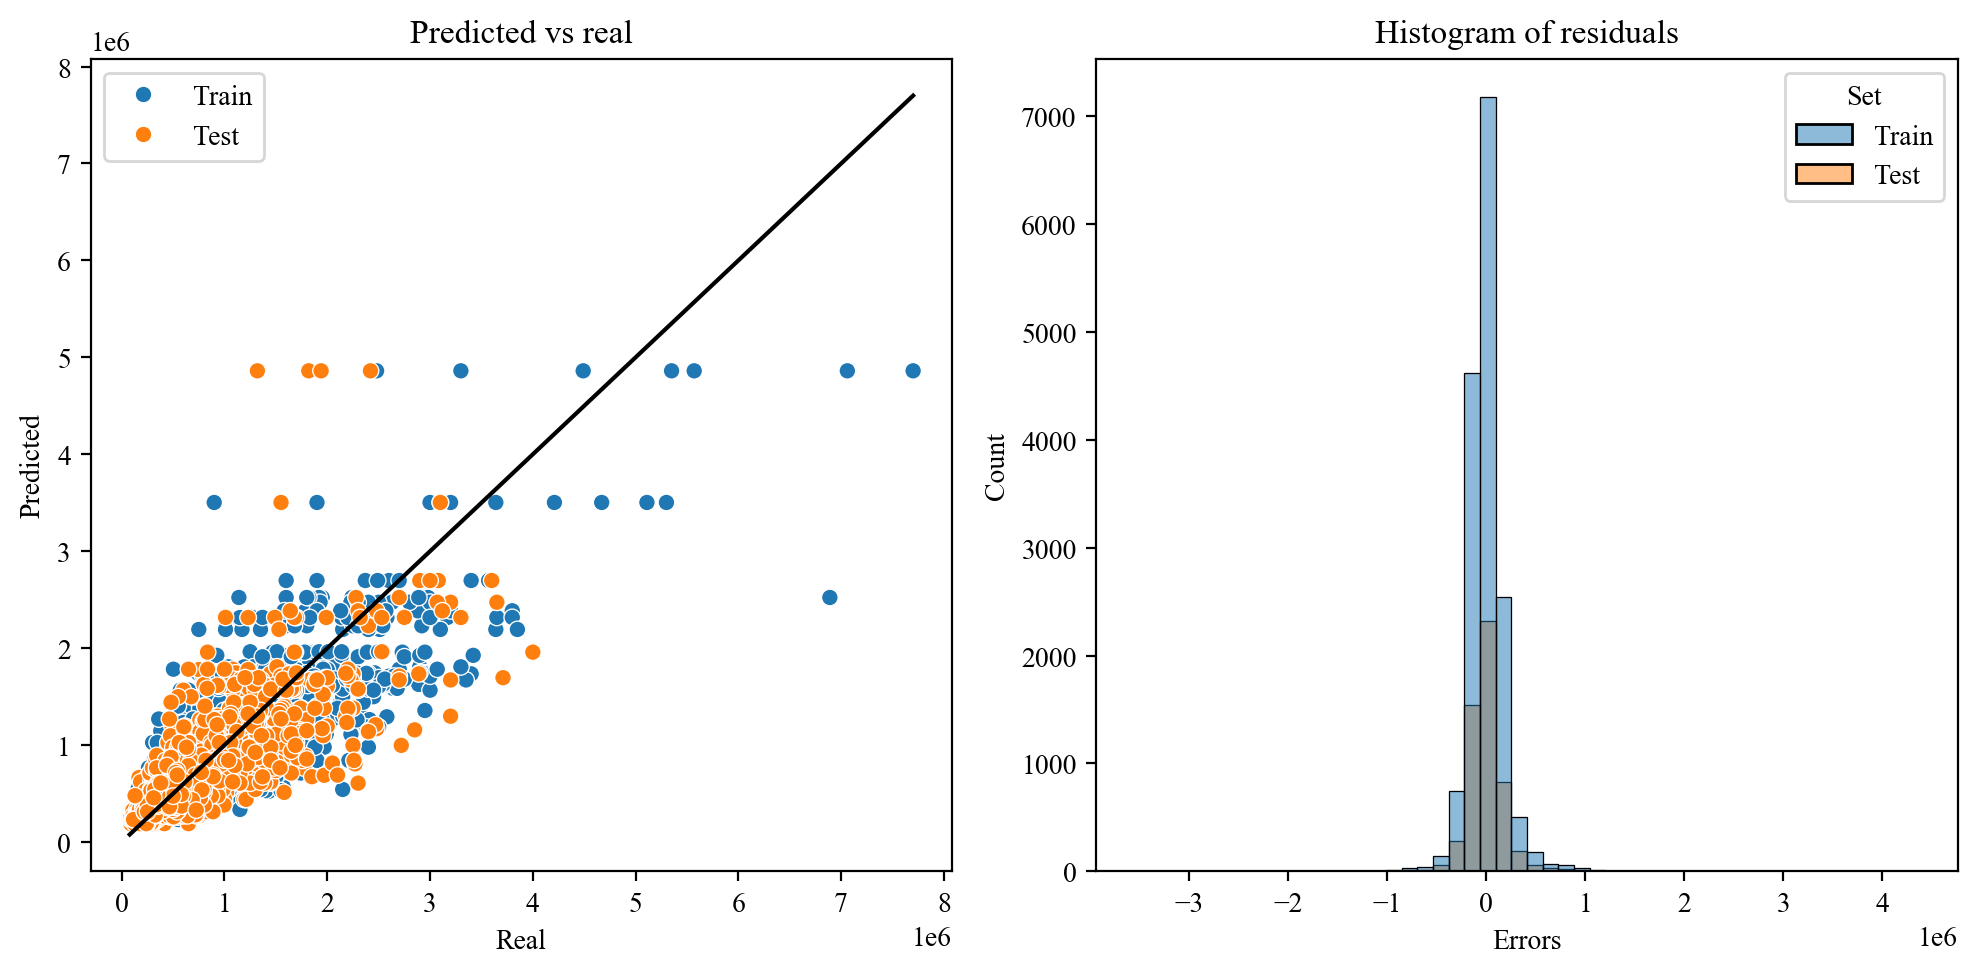

In [90]:
#visualize real and predicted
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(1,2, figsize=(10,5))

sns.scatterplot(data=results_df, x="Real", y="Predicted", hue="Set", ax=ax[0])
sns.lineplot(data=results_df, x="Real", y="Real", color="black", ax=ax[0])
ax[0].set_title("Predicted vs real")
sns.histplot(results_df, x="Errors", bins=50, hue="Set", ax=ax[1])
ax[1].set_title("Histogram of residuals")

plt.tight_layout()
plt.show()

In [91]:
#test for mae, mse, rmse, r2
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [92]:
def error_metrics_report(y_real_train: list, y_real_test: list, y_pred_train: list, y_pred_test: list) -> pd.DataFrame:
    '''
   The error metrics report function calculates for regression.

    Parameters:
    - y_real_train (list): The actual target values for the training dataset.
    - y_real_test (list): The actual target values for the testing dataset.
    - y_pred_train (list): The predicted target values for the training dataset.
    - y_pred_test (list): The predicted target values for the testing dataset.

    Returns:
    - metrics_df (DataFrame): A Pandas DataFrame containing error metrics for both the training and testing datasets.
    - 'Metric' (str): The name of the error metric.
    - 'Training Set' (float): The error metric value for the training set.
    - 'Testing Set' (float): The error metric value for the testing set.
    '''

    MAE_train = mean_absolute_error(y_real_train, y_pred_train)
    MAE_test  = mean_absolute_error(y_real_test, y_pred_test)

    # Mean squared error
    MSE_train = mean_squared_error(y_real_train, y_pred_train)
    MSE_test  = mean_squared_error(y_real_test, y_pred_test)

    # Root mean squared error
    RMSE_train = mean_squared_error(y_real_train, y_pred_train)
    RMSE_test  = mean_squared_error(y_real_test, y_pred_test)

    # R2
    R2_train = r2_score(y_real_train, y_pred_train)
    R2_test  = r2_score(y_real_test, y_pred_test)

    results = {"Metric":['MAE', 'MSE', 'RMSE', 'R2'] , 
               "Train": [MAE_train, MSE_train, RMSE_train, R2_train],
               "Test":  [MAE_test, MSE_test, RMSE_test, R2_test]}

    results_df = pd.DataFrame(results).round(2)

    pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))


    return results_df

In [93]:
error_metrics_report(list(results_df[results_df["Set"]=="Train"]["Real"]),
                     list(results_df[results_df["Set"]=="Test"]["Real"]),
                     list(results_df[results_df["Set"]=="Train"]["Predicted"]),
                     list(results_df[results_df["Set"]=="Test"]["Predicted"]))

,Metric,Train,Test
0,MAE,123394.78,133106.68
1,MSE,36856040677.92,48822113879.91
2,RMSE,36856040677.92,48822113879.91
3,R2,0.73,0.61
